Name : Kadam Samarth Sambhaji 


Batch : A96 


Task : 03 (IRIS Flower Classification )

Importing Libraries

In [7]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

Downloading Dataset 

In [8]:
df = sns.load_dataset('iris')

In [9]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [10]:
df ['species'], categories = pd.factorize(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
df.describe

<bound method NDFrame.describe of      sepal_length  sepal_width  petal_length  petal_width  species
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        2
146           6.3          2.5           5.0          1.9        2
147           6.5          3.0           5.2          2.0        2
148           6.2          3.4           5.4          2.3        2
149           5.9          3.0           5.1          1.8        2

[150 rows x 5 columns]>

In [12]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Visualization 

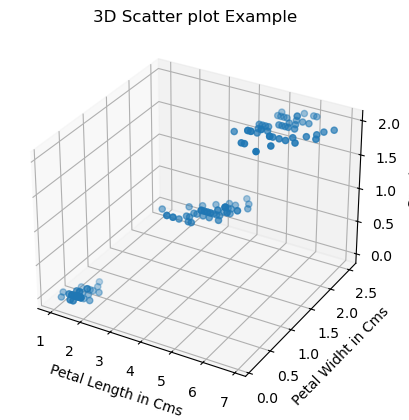

In [13]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter (df.petal_length, df.petal_width, df.species)
ax.set_xlabel('Petal Length in Cms')
ax.set_ylabel('Petal Widht in Cms')
ax.set_zlabel('Species')
plt.title('3D Scatter plot Example')
plt.show()

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

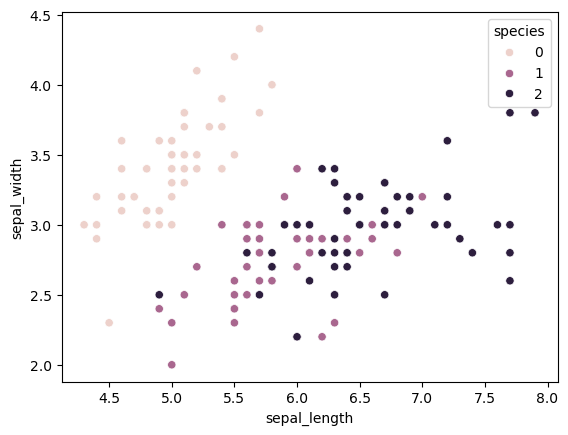

In [14]:
sns.scatterplot(data = df, x = 'sepal_length', y = 'sepal_width', hue = 'species')


<Axes: xlabel='petal_length', ylabel='petal_width'>

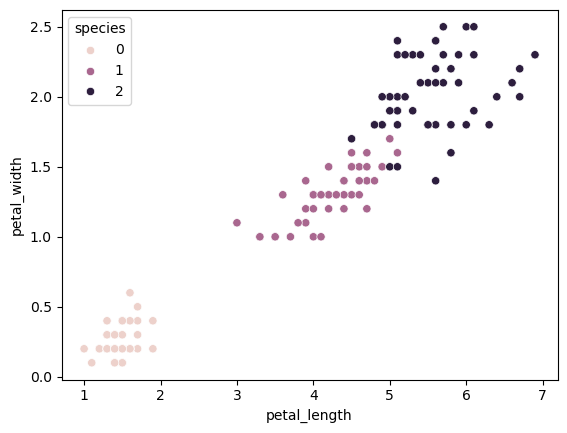

In [15]:
sns.scatterplot(data = df, x = 'petal_length', y = 'petal_width', hue = 'species')

Elbow Technique 

In [ ]:
k_rng = range(1,10)
sse = []

for k in k_rng:
    km = KMeans(n_clusters = k)
    km.fit(df[['petal_length', 'petal_width']])
sse.append(km.inertia_)

In [17]:
sse

[6.576538396386222]

In [ ]:
plt.xlabel('k_rng')
plt.ylabel('Sum of Squared Errors')
plt.plot(k_rng, sse)

In [ ]:
Applying K-Means Algorithm 

In [20]:
km = KMeans (n_clusters = 3, random_state = 0)
y_predicted = km. fit_predict(df[['petal_length', 'petal_width']])
y_predicted

C:\Users\Samarth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [22]:
df ['cluster' ] = y_predicted
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


Now Lets measure the Accuracy 

In [24]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(df.species, df.cluster)
cm

array([[ 0, 50,  0],
       [48,  0,  2],
       [ 4,  0, 46]], dtype=int64)

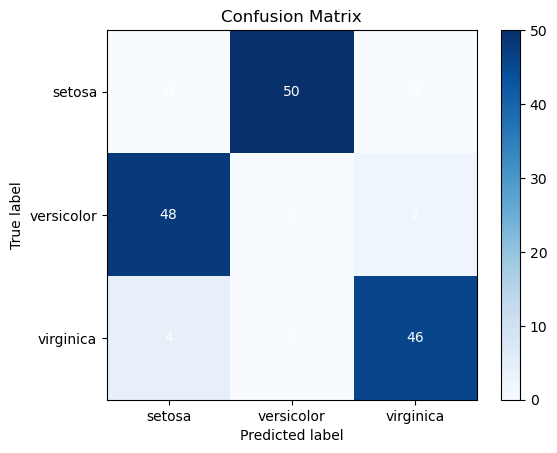

In [26]:
true_labels = df. species
predicted_labels = df.cluster

cm = confusion_matrix (true_labels, predicted_labels)
class_labels = ['setosa', 'versicolor', 'virginica' ]
plt.imshow(cm, interpolation = 'nearest', cmap= plt.cm.Blues )
plt. title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels)
plt.yticks(tick_marks, class_labels)
for i in range (len(class_labels)):
    for j in range (len(class_labels)):
        plt.text(j, i, str(cm[i][j]),ha = 'center', va = 'center', color = 'white')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

Splitting the dataset for training and testing 

In [28]:
X = df[ ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'] ]
y = df ['species' ]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
X_train, X_test, y_train, y_test

(     sepal_length  sepal_width  petal_length  petal_width
 22            4.6          3.6           1.0          0.2
 15            5.7          4.4           1.5          0.4
 65            6.7          3.1           4.4          1.4
 11            4.8          3.4           1.6          0.2
 42            4.4          3.2           1.3          0.2
 ..            ...          ...           ...          ...
 71            6.1          2.8           4.0          1.3
 106           4.9          2.5           4.5          1.7
 14            5.8          4.0           1.2          0.2
 92            5.8          2.6           4.0          1.2
 102           7.1          3.0           5.9          2.1
 
 [120 rows x 4 columns],
      sepal_length  sepal_width  petal_length  petal_width
 73            6.1          2.8           4.7          1.2
 18            5.7          3.8           1.7          0.3
 118           7.7          2.6           6.9          2.3
 78            6.0          2

Standardize the Features 

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled, X_test_scaled

Create KNN classifier 

In [36]:
knn = KNeighborsClassifier(n_neighbors=3)
knn

KNeighborsClassifier(n_neighbors=3)

Train the Model 

In [ ]:
knn.fit(X_train_scaled, y_train)

Make Prediction 

In [40]:
y_pred = knn.predict(X_test_scaled)

Converting the unique species name to list of string 

In [42]:
species_names = df['species'].unique().astype(str).tolist()
report = classification_report(y_test, y_pred, target_names=species_names)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

